# **Lab 7 : Logistic Regression**
---
## Objective
The objective of this manual is to provide a comprehensive understanding of logistic 
regression, covering its mathematical foundation and practical implementation. By the 
end of this guide, readers will be able to:
- Understand the concept and working of logistic regression.
- Implement logistic regression using Python and scikit-learn.
- Evaluate the model's performance using key metrics.
---
## Prerequisites
**Before proceeding with logistic regression, it is recommended to have a basic 
understanding of:**
- Python Programming – Familiarity with Python syntax and libraries like NumPy 
and pandas.
- Linear Regression – Basic knowledge of regression models and how they work.
- Probability & Statistics – Understanding of probability distributions and statistical 
concepts.
- Machine Learning Basics – Familiarity with supervised learning, training, and 
evaluation.
- Scikit-Learn Library – Basic knowledge of scikit-learn functions for model building
---
```**Logistic Regression** is a statistical method used for binary classification problems. 
Unlike linear regression, which predicts continuous values, logistic regression predicts 
the probability of a categorical outcome. The output is always between 0 and 1, making it 
suitable for classification.
Equation of Logistic Regression
Logistic regression is based on the sigmoid function, defined as:
𝜎(𝑧) =1/1 + 𝑒^−𝑧
where:
𝑧 = 𝑤𝑋 + 𝑏
• X is the input feature
• w(weight) and b (bias) are parameters learned from the data
• e is the Euler’s number (approximately 2.718)
The predicted probability of class 1 is:
𝑃(𝑌 = 1 ∣ 𝑋) =1/1 + 𝑒^−(𝑤𝑋+𝑏)
A threshold (e.g., 0.5) is applied to decide class labels:
𝐼𝑓 𝑃(𝑌 = 1|𝑋) ≥ 0.5,𝑡ℎ𝑒𝑛 𝑌 = 1, 𝑌 = 0.



---
## 2. Implementation of Logistic Regression
**2.1 Importing Libraries**

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**2.2 Loading and Visualizing Data**

Text(0, 0.5, 'Bought Insurance')

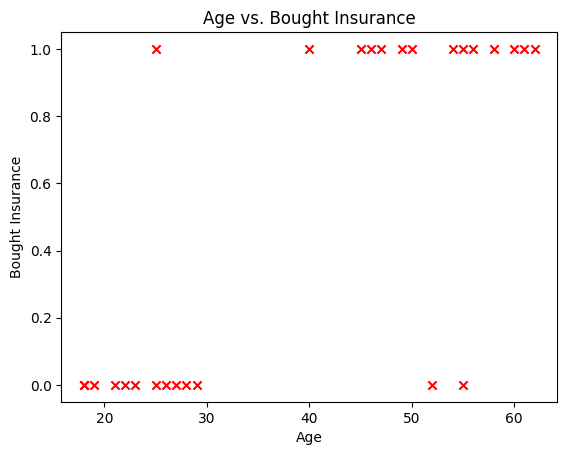

In [39]:
df = pd.read_csv("insurance_data.csv")
df.head()
plt.scatter(df.age, df.bought_insurance, marker='x', color='red')
plt.title("Age vs. Bought Insurance")
plt.xlabel("Age")
plt.ylabel("Bought Insurance")

**2.3 Splitting Data into Training and Testing Sets**


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], 
df.bought_insurance, train_size=0.8)


**2.4 Training the Logistic Regression Model**

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**2.5 Making Predictions**


In [18]:
y_predicted = model.predict(X_test)
print(y_predicted)
print(y_test)

[1 0 0 1 0 0]
9     1
26    0
12    0
25    1
13    0
21    0
Name: bought_insurance, dtype: int64


**2.6 Model Evaluation**

In [43]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.8333333333333334


**2.7 Model Coefficients**


In [7]:
import math
def sigmoid(x):
 return 1 / (1 + math.exp(-x))

**2.9 Prediction Function**


In [8]:
def prediction_function(age):
 z = 0.042 * age - 1.53 # Approximation of learned coefficients
 y = sigmoid(z)
 return y
print("Prediction for age 35:", prediction_function(35))
print("Prediction for age 43:", prediction_function(43))

Prediction for age 35: 0.4850044983805899
Prediction for age 43: 0.568565299077705


---
## 3. Conclusion
- Logistic regression is a powerful yet simple classification technique.
- It uses the sigmoid function to map predictions to probabilities.
- The model’s performance can be evaluated using metrics like accuracy.


---
# **Lab Tasks:**
- **Predict Probability of Buying Insurance – Use model.predict_proba(X_test) to get the 
    probability estimates for each test instance instead of just the class labels.**


In [23]:
y_proba = model.predict_proba(X_test)
print("Predicted Probabilities: \n", y_proba)

Predicted Probabilities: 
 [[0.06357639 0.93642361]
 [0.82610119 0.17389881]
 [0.75233012 0.24766988]
 [0.12928599 0.87071401]
 [0.70837314 0.29162686]
 [0.77256818 0.22743182]]


---
- **Modify Training Data Split Ratio – Change the train-test split ratio from 80-20 to 70-30 
or 60-40 and observe how it affects model performance.**


In [44]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.7)
model.fit(X_train, y_train)
print("Accuracy with 60-40 split:", model.score(X_test, y_test))

Accuracy with 60-40 split: 0.8888888888888888


---
- **Evaluate Model Performance Using a Confusion Matrix – Use
sklearn.metrics.confusion_matrix to generate and analyze the confusion matrix for the 
test predictions.**


In [45]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2 1]
 [0 6]]


---
- **Visualize the Sigmoid Function – Plot the sigmoid function over a range of values using 
Matplotlib to see how it maps inputs to probabilities.**


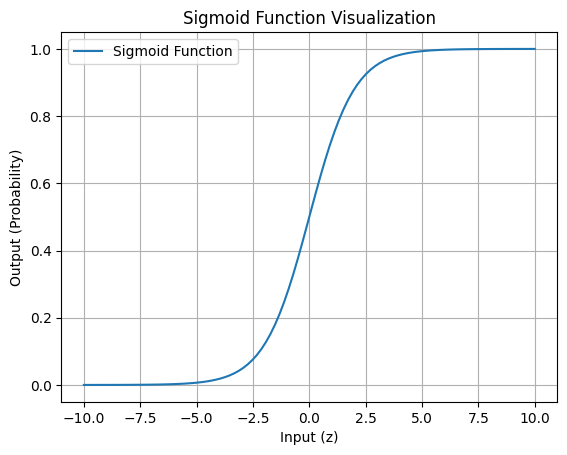

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

plt.plot(x_values, y_values, label='Sigmoid Function')
plt.xlabel("Input (z)")
plt.ylabel("Output (Probability)")
plt.title("Sigmoid Function Visualization")
plt.legend()
plt.grid()
plt.show()

- **Test Model on New Data – Manually input a new age value, pass it through the trained 
model using .predict(), and determine whether the person is likely to buy insurance.**

In [36]:
new_age = np.array([[45]])  # Input new age
prediction = model.predict(new_age)
print(f"Prediction for age 45: {'Buys Insurance' if prediction[0] == 1 else 'Does not buy Insurance'}")

Prediction for age 45: Buys Insurance


C:\Users\HB\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


---
## **To Visualize Decision Boundry:**

C:\Users\HB\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


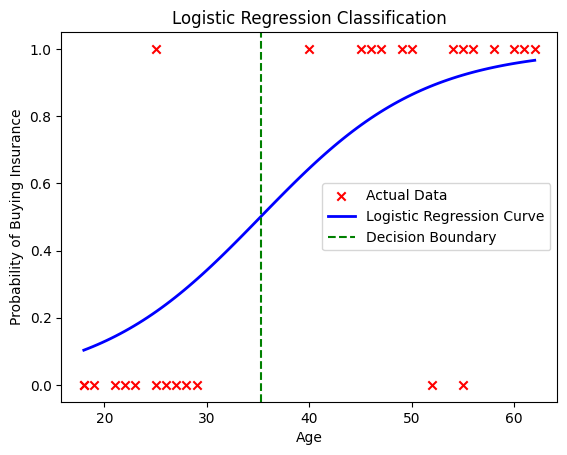

In [37]:
# Scatter plot of actual data
plt.scatter(df.age, df.bought_insurance, color='red', marker='x', label="Actual Data")

# Generate a range of age values for prediction
age_range = np.linspace(df.age.min(), df.age.max(), 100).reshape(-1, 1)

# Predict probabilities for the age range
predicted_probabilities = model.predict_proba(age_range)[:, 1]

# Plot the sigmoid curve (prediction probabilities)
plt.plot(age_range, predicted_probabilities, color='blue', linewidth=2, label="Logistic Regression Curve")

# Decision boundary: Find age where probability ≈ 0.5
decision_boundary = -model.intercept_[0] / model.coef_[0]
plt.axvline(x=decision_boundary, color='green', linestyle='--', label="Decision Boundary")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.title("Logistic Regression Classification")
plt.legend()
plt.show()

**ThankYou**